# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the the python functionality at hand

## Library import

In [1]:
from report_manager import project, analysisResult
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


*


*  Package WGCNA 1.66 loaded.
*








## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [2]:
p = project.Project('P0000001', datasets=None, report={})

Imputing row 1/10 with 27 missing, elapsed time: 0.001
Imputing row 1/10 with 22 missing, elapsed time: 0.001
Imputing row 1/10 with 31 missing, elapsed time: 0.001
Imputing row 1/10 with 27 missing, elapsed time: 0.001
Imputing row 1/8 with 31 missing, elapsed time: 0.001
pickSoftThreshold: will use block size 511.


 pickSoftThreshold: calculating connectivity for given powers...


   ..working on genes 1 through 511 of 511


  
 Power
 SFT.R.sq
 slope
 truncated.R.sq
  mean.k.
 median.k.
  max.k.

1 
     1
    0.474
 -4.31
         0.9570
 71.80000
  6.98e+01
 110.000

2 
     2
    0.712
 -3.20
         0.9760
 16.00000
  1.48e+01
  36.200

3 
     3
    0.835
 -2.75
         0.9880
  4.55000
  3.94e+00
  14.600

4 
     4
    0.904
 -2.44
         0.9810
  1.55000
  1.20e+00
   6.840

5 
     5
    0.927
 -2.23
         0.9660
  0.61000
  4.11e-01
   3.610

6 
     6
    0.967
 -1.85
         0.9670
  0.27400
  1.55e-01
   2.120

7 
     7
    0.320
 -3.11
         0.1980
  0.139

## Visualizing the Project report

In [3]:
plots = p.show_report("notebook")

## Access to datasets

### Clinical data

In [4]:
clin_dataset = p.get_dataset('clinical').get_dataset('preprocessed')
clin_dataset.head()

Age  Alanine aminotransferase measurement  \
subject biological_sample                                               
S30     BS30               73.0                                  24.0   
S31     BS31               49.0                                  27.0   
S32     BS32               66.0                                  18.0   
S33     BS33               61.0                                  22.0   
S34     BS34               44.0                                  18.0   

                           Alkaline phosphatase measurement  \
subject biological_sample                                     
S30     BS30                                           54.0   
S31     BS31                                           27.0   
S32     BS32                                           69.0   
S33     BS33                                          101.0   
S34     BS34                                           61.0   

                           Aspartate aminotransferase measurement  \
subject biological_sample                                           
S30     BS30                                                 30.0   
S31     BS31                                                 28.0   
S32     BS32                                                 21.0   
S33     BS33                                                 26.0   
S34     BS34                                                 25.0   

                           Bilirubin level  Body height  Body mass index  \
subject biological_sample                                                  
S30     BS30                          15.0        182.0        27.774423   
S31     BS31                          17.0        177.0        28.727377   
S32     BS32                           9.0        158.0        28.841532   
S33     BS33                          12.0        165.0        42.056933   
S34     BS34                           8.0        182.0        29.434851   

                           Diastole  Fasting blood glucose level  \
subject biological_sample                                          
S30     BS30                   83.0                         5.07   
S31     BS31                   95.0                         6.09   
S32     BS32                   97.0                         4.93   
S33     BS33                   93.0                         5.33   
S34     BS34                   76.0                         4.80   

                           Gamma glutamyl transferase measurement  \
subject biological_sample                                           
S30     BS30                                                 21.0   
S31     BS31                                                 38.0   
S32     BS32                                                 18.0   
S33     BS33                                                 20.0   
S34     BS34                                                 13.0   

                           Hemoglobin A1c measurement  \
subject biological_sample                               
S30     BS30                                      6.3   
S31     BS31                                      5.8   
S32     BS32                                      6.2   
S33     BS33                                      6.2   
S34     BS34                                      5.4   

                           High density lipoprotein measurement  \
subject biological_sample                                         
S30     BS30                                               1.26   
S31     BS31                                               1.70   
S32     BS32                                               1.12   
S33     BS33                                               0.91   
S34     BS34                                               1.21   

                           Low density lipoprotein cholesterol measurement  \
subject biological_sample                                                    
S30     BS30                                                          

#### Further dataset manipulation and visualization

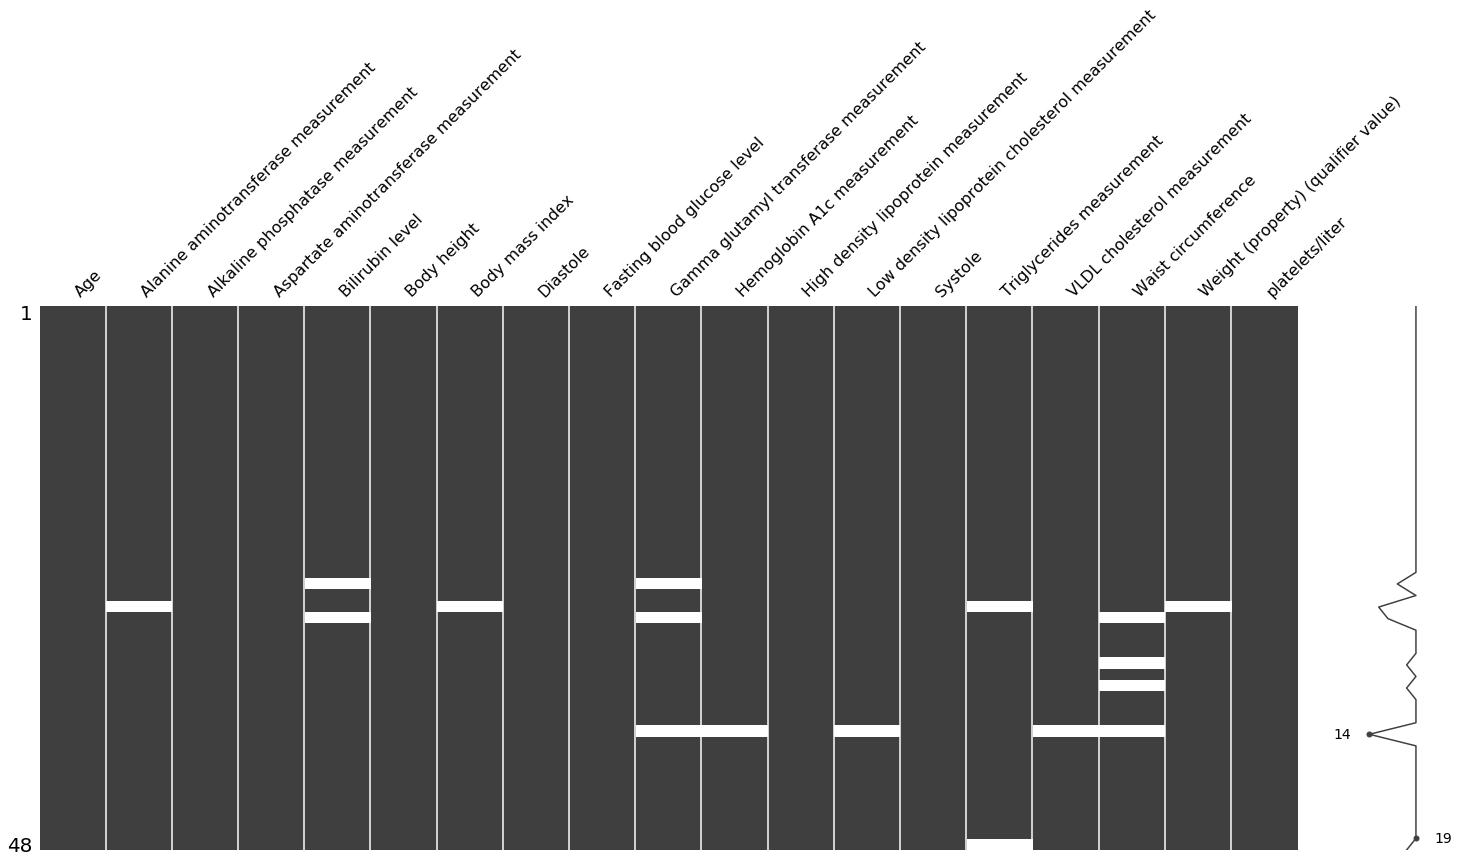

In [5]:
clin_dataset = clin_dataset.reset_index().set_index('subject').drop(['group', 'biological_sample'], axis=1)#.pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)


### Proteomics dataset (original)

In [6]:
dataset = p.get_dataset("proteomics").get_dataset("dataset")

In [7]:
dataset.head()

LFQ_intensity      group identifier     name sample subject
0      36.516120  Cirrhosis     V9HW68  HEL-214   AS70     S70
1      28.612315  Cirrhosis     Q9UL90            AS70     S70
2      26.322769  Cirrhosis     S6BAM6            AS70     S70
3      31.463291  Cirrhosis     S6BGE0            AS70     S70
4      22.469347  Cirrhosis     Q9Y5C1  ANGPTL3   AS70     S70

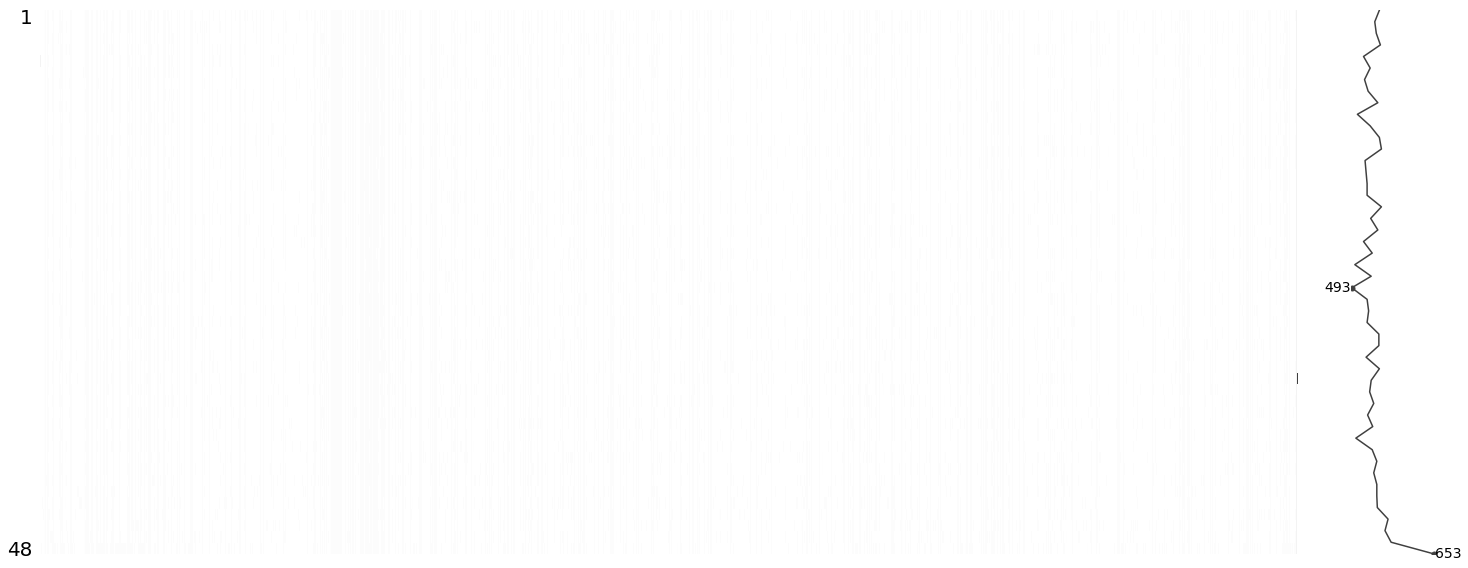

In [8]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

In [9]:
preprocessed_dataset = p.get_dataset('clinical').get_dataset('preprocessed')
preprocessed_dataset.head()

Age  Alanine aminotransferase measurement  \
subject biological_sample                                               
S30     BS30               73.0                                  24.0   
S31     BS31               49.0                                  27.0   
S32     BS32               66.0                                  18.0   
S33     BS33               61.0                                  22.0   
S34     BS34               44.0                                  18.0   

                           Alkaline phosphatase measurement  \
subject biological_sample                                     
S30     BS30                                           54.0   
S31     BS31                                           27.0   
S32     BS32                                           69.0   
S33     BS33                                          101.0   
S34     BS34                                           61.0   

                           Aspartate aminotransferase measurement  \
subject biological_sample                                           
S30     BS30                                                 30.0   
S31     BS31                                                 28.0   
S32     BS32                                                 21.0   
S33     BS33                                                 26.0   
S34     BS34                                                 25.0   

                           Bilirubin level  Body height  Body mass index  \
subject biological_sample                                                  
S30     BS30                          15.0        182.0        27.774423   
S31     BS31                          17.0        177.0        28.727377   
S32     BS32                           9.0        158.0        28.841532   
S33     BS33                          12.0        165.0        42.056933   
S34     BS34                           8.0        182.0        29.434851   

                           Diastole  Fasting blood glucose level  \
subject biological_sample                                          
S30     BS30                   83.0                         5.07   
S31     BS31                   95.0                         6.09   
S32     BS32                   97.0                         4.93   
S33     BS33                   93.0                         5.33   
S34     BS34                   76.0                         4.80   

                           Gamma glutamyl transferase measurement  \
subject biological_sample                                           
S30     BS30                                                 21.0   
S31     BS31                                                 38.0   
S32     BS32                                                 18.0   
S33     BS33                                                 20.0   
S34     BS34                                                 13.0   

                           Hemoglobin A1c measurement  \
subject biological_sample                               
S30     BS30                                      6.3   
S31     BS31                                      5.8   
S32     BS32                                      6.2   
S33     BS33                                      6.2   
S34     BS34                                      5.4   

                           High density lipoprotein measurement  \
subject biological_sample                                         
S30     BS30                                               1.26   
S31     BS31                                               1.70   
S32     BS32                                               1.12   
S33     BS33                                               0.91   
S34     BS34                                               1.21   

                           Low density lipoprotein cholesterol measurement  \
subject biological_sample                                                    
S30     BS30                                                          

### Proteomics dataset (imputed)

In [10]:
reg_dataset = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_dataset#.loc[reg_dataset['identifier'] == 'O60341-KDM1A',:]

identifier           group1           group2  log2FC   lower   upper  \
0      -A0A068LRW0        Cirrhosis          Healthy  3.3417 -0.8095  7.4928   
1      -A0A068LRW0        Cirrhosis   NAFLD with NGT -0.8556 -5.0067  3.2956   
2      -A0A068LRW0        Cirrhosis  NAFLD with T2DM -0.1809 -4.3320  3.9703   
3      -A0A068LRW0        Cirrhosis              T2D -1.4130 -5.8160  2.9900   
4      -A0A068LRW0          Healthy   NAFLD with NGT -4.1973 -8.3484 -0.0461   
5      -A0A068LRW0          Healthy  NAFLD with T2DM -3.5225 -7.6737  0.6286   
6      -A0A068LRW0          Healthy              T2D -4.7547 -9.1576 -0.3517   
7      -A0A068LRW0   NAFLD with NGT  NAFLD with T2DM  0.6747 -3.4764  4.8259   
8      -A0A068LRW0   NAFLD with NGT              T2D -0.5574 -4.9604  3.8455   
9      -A0A068LRW0  NAFLD with T2DM              T2D -1.2321 -5.6351  3.1708   
10     -A0A0G2JRQ6        Cirrhosis          Healthy  0.0160 -1.5844  1.6165   
11     -A0A0G2JRQ6        Cirrhosis   NAFLD with NGT  0.0189 -1.5815  1.6194   
12     -A0A0G2JRQ6        Cirrhosis  NAFLD with T2DM -0.1241 -1.7246  1.4763   
13     -A0A0G2JRQ6        Cirrhosis              T2D  0.5862 -1.1114  2.2837   
14     -A0A0G2JRQ6          Healthy   NAFLD with NGT  0.0029 -1.5976  1.6033   
15     -A0A0G2JRQ6          Healthy  NAFLD with T2DM -0.1402 -1.7406  1.4603   
16     -A0A0G2JRQ6          Healthy              T2D  0.5701 -1.1274  2.2676   
17     -A0A0G2JRQ6   NAFLD with NGT  NAFLD with T2DM -0.1430 -1.7435  1.4574   
18     -A0A0G2JRQ6   NAFLD with NGT              T2D  0.5672 -1.1303  2.2648   
19     -A0A0G2JRQ6  NAFLD with T2DM              T2D  0.7103 -0.9872  2.4078   
20     -A0A0X9T0H6        Cirrhosis          Healthy -0.5506 -1.3276  0.2263   
21     -A0A0X9T0H6        Cirrhosis   NAFLD with NGT -0.2817 -1.0587  0.4953   
22     -A0A0X9T0H6        Cirrhosis  NAFLD with T2DM -0.2601 -1.0371  0.5168   
23     -A0A0X9T0H6        Cirrhosis              T2D  0.0502 -0.7739  0.8743   
24     -A0A0X9T0H6          Healthy   NAFLD with NGT  0.2689 -0.5080  1.0459   
25     -A0A0X9T0H6          Healthy  NAFLD with T2DM  0.2905 -0.4865  1.0674   
26     -A0A0X9T0H6          Healthy              T2D  0.6008 -0.2233  1.4249   
27     -A0A0X9T0H6   NAFLD with NGT  NAFLD with T2DM  0.0215 -0.7554  0.7985   
28     -A0A0X9T0H6   NAFLD with NGT              T2D  0.3319 -0.4922  1.1560   
29     -A0A0X9T0H6  NAFLD with T2DM              T2D  0.3103 -0.5138  1.1344   
...            ...              ...              ...     ...     ...     ...   
5080    VWF-P04275        Cirrhosis          Healthy -0.7022 -1.5971  0.1927   
5081    VWF-P04275        Cirrhosis   NAFLD with NGT -0.7473 -1.6422  0.1476   
5082    VWF-P04275        Cirrhosis  NAFLD with T2DM -0.4223 -1.3172  0.4726   
5083    VWF-P04275        Cirrhosis              T2D -1.2135 -2.1627 -0.2643   
5084    VWF-P04275          Healthy   NAFLD with NGT -0.0451 -0.9400  0.8498   
5085    VWF-P04275          Healthy  NAFLD with T2DM  0.2799 -0.6150  1.1748   
5086    VWF-P04275          Healthy              T2D -0.5113 -1.4605  0.4379   
5087    VWF-P04275   NAFLD with NGT  NAFLD with T2DM  0.3250 -0.5699  1.2199   
5088    VWF-P04275   NAFLD with NGT              T2D -0.4662 -1.4154  0.4830   
5089    VWF-P04275  NAFLD with T2DM              T2D -0.7912 -1.7404  0.1580   
5090  YWHAZ-P63104        Cirrhosis          Healthy  0.1521 -1.2969  1.6011   
5091  YWHAZ-P63104        Cirrhosis   NAFLD with NGT  0.3829 -1.0661  1.8319   
5092  YWHAZ-P63104        Cirrhosis  NAFLD with T2DM -0.1663 -1.6153  1.2827   
5093  YWHAZ-P63104        Cirrhosis              T2D  0.3869 -1.1500  1.9238   
5094  YWHAZ-P63104          Healthy   NAFLD with NGT  0.2308 -1.2183  1.6798   
5095  YWHAZ-P63104          Healthy  NAFLD with T2DM -0.3184 -1.7675  1.1306   
5096  YWHAZ-P63104          Healthy              T2D  0.2348 -1.3022  1.7717   
5097  YWHAZ-P63104   NAFLD with NGT  NAFLD with T2DM -0.5492 -1.9982  0.8998   
5098  YW

In [ ]:
result = analysisResult.AnalysisResult("Mapper analysis", analysis_type = "mapper", 
                           args = {"n_cubes": 15,
                                   "overlap": 0.85,
                                   "n_clusters": 2,
                                   "linkage": "single",
                                  "title":"Topological data analysis - Sample stratification"}, data=reg_dataset)
mapper_plot = result.get_plot(name="mapper", identifier="mapper_plot")[0]

In [ ]:
#iplot(mapper_plot.figure)

## Analyses results

#### Differential regulation

In [12]:
reg_table = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_table.head()

identifier     group1           group2  log2FC   lower   upper  rejected  \
0  -A0A068LRW0  Cirrhosis          Healthy  3.3417 -0.8095  7.4928     False   
1  -A0A068LRW0  Cirrhosis   NAFLD with NGT -0.8556 -5.0067  3.2956     False   
2  -A0A068LRW0  Cirrhosis  NAFLD with T2DM -0.1809 -4.3320  3.9703     False   
3  -A0A068LRW0  Cirrhosis              T2D -1.4130 -5.8160  2.9900     False   
4  -A0A068LRW0    Healthy   NAFLD with NGT -4.1973 -8.3484 -0.0461     False   

          FC  t-statistics    pvalue  -log10 pvalue      padj  \
0  10.137992      3.114222  0.024556       1.609848  0.069399   
1  -1.809511      3.114222  0.024556       1.609848  0.069399   
2  -1.133591      3.114222  0.024556       1.609848  0.069399   
3  -2.662903      3.114222  0.024556       1.609848  0.069399   
4 -18.344809      3.114222  0.024556       1.609848  0.069399   

                  correction  
0  permutation FDR (50 perm)  
1  permutation FDR (50 perm)  
2  permutation FDR (50 perm)  
3  permutation FDR (50 perm)  
4  permutation FDR (50 perm)